In [1]:
import tensorflow as tf
tf.__version__

'1.14.0'

In [6]:
tf.__version__

'1.12.2'

In [21]:
# tensor의 print임.
hello = tf.constant('Hello, TensorFlow!')
sess = tf.Session() # tf.constant('Hello, TensorFlow!').Session()

In [3]:
hello # 0차원

<tf.Tensor 'Const:0' shape=() dtype=string>

In [4]:
type(hello)

tensorflow.python.framework.ops.Tensor

In [5]:
type(tf.constant(1))

tensorflow.python.framework.ops.Tensor

In [6]:
result = sess.run(hello); result # tf.Session().run(tf.constant('Hello, TensorFlow!'))

b'Hello, TensorFlow!'

In [7]:
tf.Session().run(tf.constant('Hello, TensorFlow!'))

b'Hello, TensorFlow!'

In [8]:
type(result) 

bytes

In [9]:
type(hello), type(sess)

(tensorflow.python.framework.ops.Tensor,
 tensorflow.python.client.session.Session)

In [10]:
# 아래 그림과 같은 노드들을 생성한다.
node1 = tf.constant(3.0) # A
node2 = tf.constant(4.0) # B

node3 = tf.add(node1, node2) # 더해주는 노드라고 나옴
print("node1 :", node1) # 0차원
print("node2 :", node2) # 0차원
print("node3 :", node3) 

node1 : Tensor("Const_3:0", shape=(), dtype=float32)
node2 : Tensor("Const_4:0", shape=(), dtype=float32)
node3 : Tensor("Add:0", shape=(), dtype=float32)


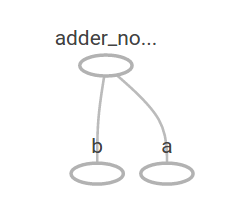

In [11]:
sess = tf.Session()
print("sess.run(node1, node2)\t: ", sess.run([node1, node2]))
print("sess.run(adder_node)  \t: ", sess.run(node3))

sess.run(node1, node2)	:  [3.0, 4.0]
sess.run(adder_node)  	:  7.0


In [12]:
sess.run(node1), sess.run(node2)

(3.0, 4.0)

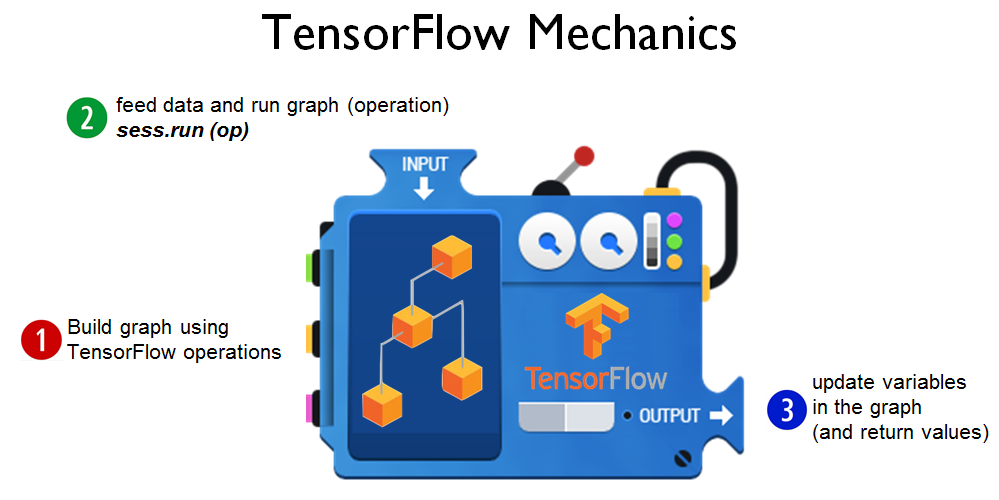

## Placeholder

In [13]:
a = tf.placeholder(tf.float32)
b = tf.placeholder(tf.float32)

# + provieds a shortcut for tf.add(a, b)
adder_node = a + b

In [ ]:
# TensrFlow Mechanism for placeholder

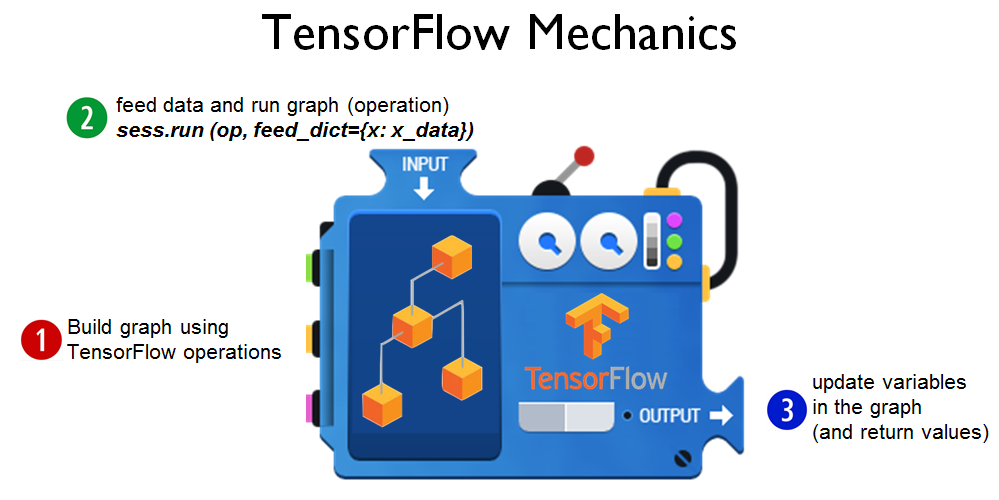

In [14]:
# 다 더해줌
sess.run(adder_node, feed_dict = {a: 3, b: 4.5})

7.5

In [15]:
# 인덱스별로 더해줌
sess.run(adder_node, feed_dict={a: [1,3], b: [2, 4]})

array([3., 7.], dtype=float32)

In [16]:
add_and_triple = adder_node * 3.

In [25]:
# 곱하고 다 더함
sess.run(add_and_triple, feed_dict={a: 3, b:4.5})

22.5

In [24]:
a = tf.placeholder('int32')
b = tf.placeholder('int32')

sess = tf.Session()
print("tf.mul({a},{b}) : {y}".format(
    a = 20, b = 30,
    y = sess.run(tf.multiply(a, b) , feed_dict={a: 20, b: 30})
))

tf.mul(20,30) : 600


## Constant & Variable

In [30]:
import tensorflow as tf
x = tf.constant(100, name = 'x')
# 변수지정을 해줘야 연산할 수 있는 걸로 되는듯
y = tf.Variable(x * 2, name = 'y')

model = tf.initialize_all_variables()


# with tf.Session() as sess:
sess.run(model)
print("Check the variable : \n- constant x : {x} \n- Variable y : {y}".format(
    x = sess.run(x), 
    y = sess.run(y)
))


Check the variable : 
- constant x : 100 
- Variable y : 200


## Everything is Tensor

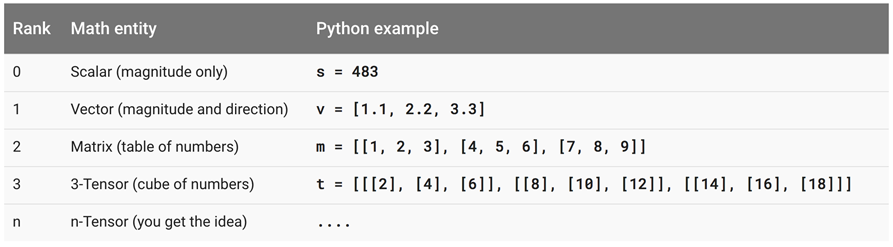

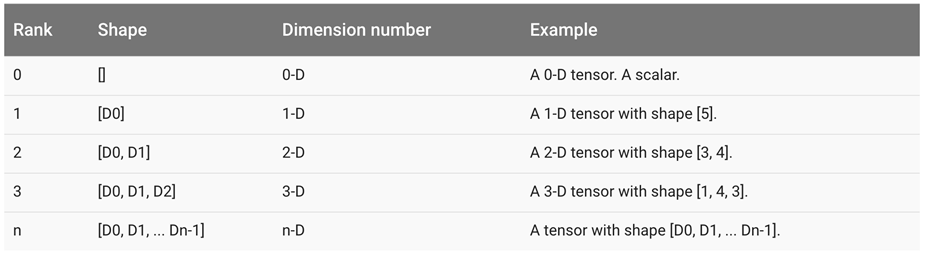

#a rank 0 tensor; this is a scalar with shape [] 3 # a rank 1 tensor; this is a vector with shape [3] [1. ,2., 3.] # a rank 2 tensor; a matrix with shape [2, 3] [[1., 2., 3.], [4., 5., 6.]] # a rank 3 tensor with shape [2, 1, 3] [[[1., 2., 3.]], [[7., 8., 9.]]]


In [31]:
rank0 = 3
rank0, type(rank0)

(3, int)

In [34]:
rank1 = [1. ,2., 3.]
rank1, type(rank1[0])

([1.0, 2.0, 3.0], float)

In [ ]:
rank2 = [[1., 2., 3.], 
         [4., 5., 6.]]
rank2

In [39]:
rank3 = [
            [
                [1., 2., 3.]
            ], 
            [
                [7., 8., 9.]
            ]
] 
rank3, type(rank3)

([[[1.0, 2.0, 3.0]], [[7.0, 8.0, 9.0]]], list)

## 텐서플로우 연산

In [42]:
import tensorflow as tf 
import numpy as np

In [43]:
tensor_1d = np.array([1.2, 3.4, 5.6, 7.8])
tensor_1d

array([1.2, 3.4, 5.6, 7.8])

In [47]:
tensor_2d = np.arange(16).reshape((4,4))
tensor_2d, type(tensor_2d[0][0])

(array([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11],
        [12, 13, 14, 15]]), numpy.int32)

In [41]:
sess = tf.Session()
tf_tensor_1d = tf.convert_to_tensor(tensor_1d,dtype=tf.float64)
tf_tensor_2d = tf.convert_to_tensor(tensor_2d,dtype=tf.float64)

In [44]:
sess.run(tf_tensor_1d)

array([1.2, 3.4, 5.6, 7.8])

In [45]:
sess.run(tf_tensor_1d[0])

1.2

In [46]:
# 세 번째부터 끝까지
sess.run(tf_tensor_1d[2:])

array([5.6, 7.8])

In [47]:
sess.run(tf_tensor_2d)

array([[ 0.,  1.,  2.,  3.],
       [ 4.,  5.,  6.,  7.],
       [ 8.,  9., 10., 11.],
       [12., 13., 14., 15.]])

In [48]:
#sess.run(tf_tensor_2d[3][3])
sess.run(tf_tensor_2d[3, 3])

15.0

In [49]:
sess.run(tf_tensor_2d[1:3, 1:3])

array([[ 5.,  6.],
       [ 9., 10.]])

In [58]:
import tensorflow as tf
import numpy as np

# 3x3 행렬
matrix1 = np.array([(1, 1, 1), (1, 1, 1), (1, 1, 1)])
matrix2 = np.array([(2, 2, 2), (2, 2, 2), (2, 2, 2)])

# constant, 텐서 자료 구조로 변환 # 애는 이런식으로 데이터타입을 정해줄 수 있음
# matrix1 = tf.constant(matrix1)
# matrix2 = tf.constant(matrix2)
matrix1 = tf.constant(matrix1, dtype='int32')
matrix2 = tf.constant(matrix2, dtype='int32')

# 행렬곱과 행렬합 계산
matrix_mul = tf.matmul(matrix1, matrix2)
matrix_sum = tf.add(matrix1, matrix2)

sess.run(matrix_mul), sess.run(matrix_sum)

(array([[6, 6, 6],
        [6, 6, 6],
        [6, 6, 6]]), array([[3, 3, 3],
        [3, 3, 3],
        [3, 3, 3]]))

In [59]:
# 행렬의 행렬식(determinant)
matrix3 = np.array([(2, 7, 2), (1, 4, 2), (9, 0, 2)], dtype='float32')
print('matrix3 = {}'.format(matrix3))

# 정방행렬로 돌려줌
matrix_dtm = tf.matrix_determinant(matrix3)
print('matrix_dtm = {}'.format(matrix_dtm))

matrix3 = [[2. 7. 2.]
 [1. 4. 2.]
 [9. 0. 2.]]
matrix_dtm = Tensor("MatrixDeterminant:0", shape=(), dtype=float32)


In [51]:
# 세션을 열고 그래프 연산
with tf.Session() as sess:
    result1 = sess.run(matrix_mul)
    result2 = sess.run(matrix_sum)
    result3 = sess.run(matrix_dtm)
    
    # tensorboard for graph
    # writer = tf.summary.FileWriter("./graph/sect01", sess.graph)

# 연산 결과 출력
print('matrix_mul = {}'.format(result1))
print('matrix_sum = {}'.format(result2))
print('matrix_dtm = {}'.format(result3))

matrix_mul = [[6 6 6]
 [6 6 6]
 [6 6 6]]
matrix_sum = [[3 3 3]
 [3 3 3]
 [3 3 3]]
matrix_dtm = 56.00001907348633


In [61]:
! pip install PyHamcrest

In [62]:
! pip install tensorboard